### First let us import the necessary packages that are required for our analysis

In [72]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

### We would use the keras.utils.get_file method to download the dataset from the below link provided

In [73]:
dataset_path = keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

### SInce we have downloaded only the raw data we need to assign the column names separately

In [74]:
columns = ["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]

### Now we would read the data which we just downloaded into a dataframe

In [96]:
auto_data = pd.read_csv(dataset_path,names=columns,na_values="?",comment="\t",sep=" ",skipinitialspace=True)

### Let us have a look at the first 5 instances of the data

In [97]:
auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Let us see the features in the dataset in details

In [98]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


### From the data it is evident that the dataframe has 398 entries.
### The following are the independant variables in the dataset :-
### Horsepower, Cylinders, Displacement, Weight, Acceleration, Model Year, Origin
### MPG is the dependant variable which we would generalise by training our model with the independant features. 
### Horsepower has got 6 missing values. Let us see if we can impute the missing values

In [99]:
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### Instead of dropping the missing values we would impute those with the mean of the distribution. In that way we do not have to do away with 6 instances keeping in mind we have a pretty small dataset at our disposal

In [100]:
auto_data.loc[auto_data["Horsepower"].isna(),"Horsepower"] = np.mean(auto_data["Horsepower"])

### Let us check the missing values again to check whether the null values have been imputed or not

In [101]:
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### The feature Origin is a categorical variable so we need to perform one hot encoding for it

In [102]:
auto_data = pd.get_dummies(auto_data,columns=["Origin","Cylinders","Model Year"],prefix_sep="_")

In [103]:
auto_data.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Origin_1,Origin_2,Origin_3,Cylinders_3,Cylinders_4,...,Model Year_73,Model Year_74,Model Year_75,Model Year_76,Model Year_77,Model Year_78,Model Year_79,Model Year_80,Model Year_81,Model Year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### From the metadeta we came to know that 1 signifies USA, 2 signifies Europe and 3 signifies Japan so we must rename the columns likewise

In [104]:
#auto_data.columns = ["MPG","Displacement","Horsepower","Weight","Acceleration","Model Year","USA","Europe","Japan","Cylinders_3","Cylinders_4","Cylinders_5","Cylinders_6","Cylinders_8"]

### Let us have a quick visualization of the dataset using seaborn package

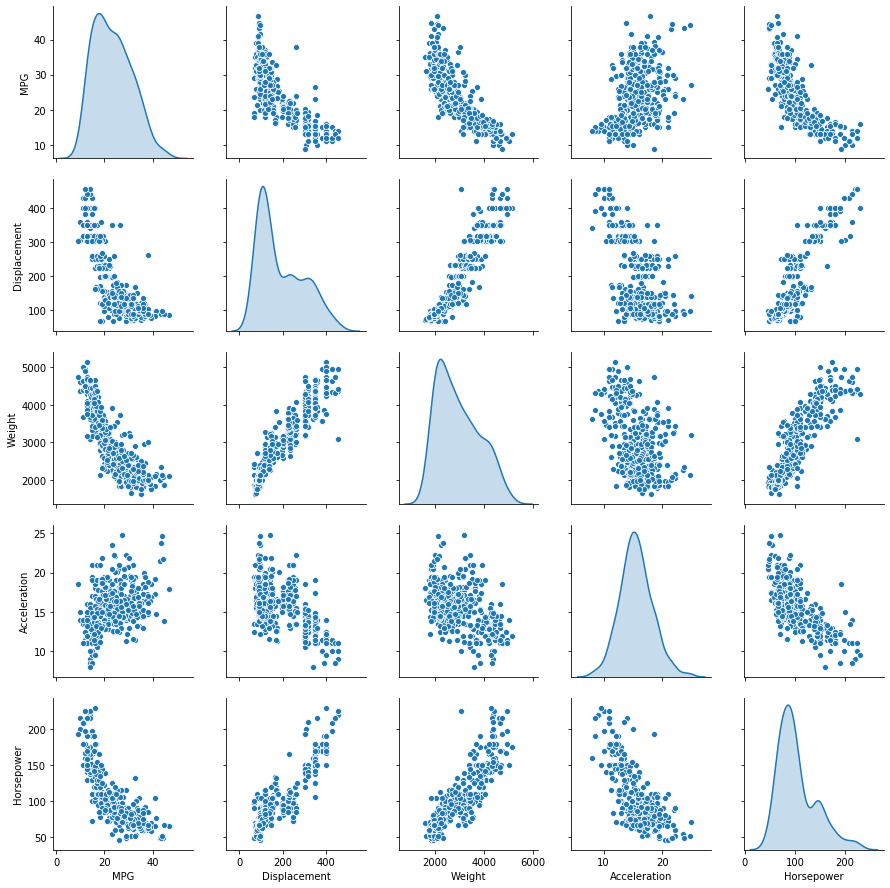

In [105]:
sns.pairplot(auto_data[["MPG","Displacement","Weight","Acceleration","Horsepower"]],diag_kind="kde")

### Let us a look a the correlation matrix of the dataset which we would show in a heatmap

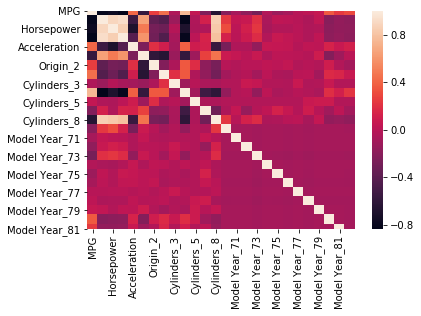

In [106]:
corr = auto_data.corr()
sns.heatmap(corr)

### Now let us shuffle the data and make training and testing set from it

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scaling(dataset,columns):
    for column in columns:
        x = np.array(dataset[column])
        x = x.reshape(-1,1)
        dataset[column] = scaler.fit_transform(x)

In [108]:
columns = ["Displacement","Horsepower","Weight","Acceleration"]
scaling(auto_data,columns)

In [109]:
auto_data = auto_data.sample(frac=1)
y = auto_data["MPG"]
X = auto_data.drop(columns=["MPG"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

### Since the data is very skewed and is spread accross a wide range for all the features we nned to normalize the data by replacing the data with the z-score of the data

In [ ]:
#def normalize(x):
 #   return (x-np.mean(x)/(np.std(x)))

In [ ]:
#X_train = normalize(X_train)
#X_test = normalize(X_test)

In [110]:
len(X_train.keys())

25

### Let us now build a Sequential model using Keras

In [111]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation=tf.nn.relu,input_shape=[len(X_train.keys())]),
        layers.Dense(64,activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=["mae","mse"])
    
    return model

In [112]:
model = build_model()

In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [114]:
class Printdot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0:
            print('')
        else:
            print(".",end='')

In [115]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=0,callbacks=[Printdot()])


...................................................................................................

In [116]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,4.120895,1.442118,4.120895,6.871472,1.950080,6.871471,95
96,4.190675,1.447555,4.190675,6.998721,2.079882,6.998721,96
97,4.146179,1.438647,4.146179,6.663169,1.971993,6.663168,97
98,4.245906,1.429558,4.245906,6.620580,1.967602,6.620580,98
99,4.086406,1.431193,4.086406,7.359087,2.035571,7.359087,99


In [117]:
def plot_history(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.plot(hist['epoch'],hist['mae'],label="Train Error")
    plt.plot(hist['epoch'],hist['val_mae'],label="Validation Error")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Absolute Error")
    plt.legend()
    plt.ylim([0,5])
    
    
    plt.figure()
    plt.plot(hist['epoch'],hist['mse'],label="Train Error")
    plt.plot(hist['epoch'],hist['val_mse'],label="Validation Error")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Sqaured Error")
    plt.legend()
    plt.ylim([0,20])
    

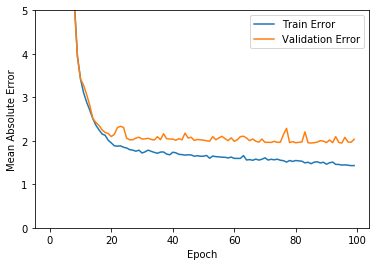

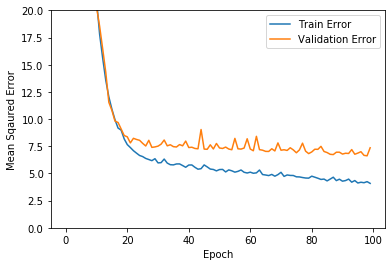

In [118]:
plot_history(history)

### The model is highly overfit so we need to apply early stopping while training the model

In [119]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)

history = model.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=0,callbacks=[early_stop,Printdot()])


...................................

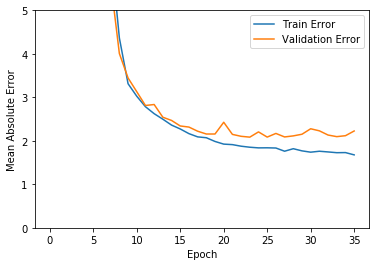

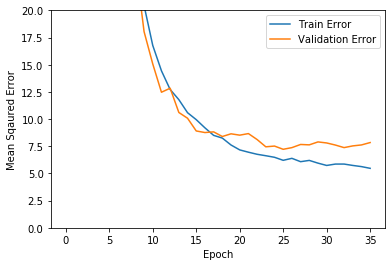

In [120]:
plot_history(history)

In [121]:
loss, mae, mse = model.evaluate(X_test,y_test,verbose=0)

In [122]:
print("Model loss : {}".format(loss))
print("Model Mean Absolute Error : {}".format(mae))
print("Model Mean Sqared Error : {}".format(mse))

Model loss : 5.440427780151367
Model Mean Absolute Error : 1.7680736780166626
Model Mean Sqared Error : 5.440427780151367


### Now let us make predictions

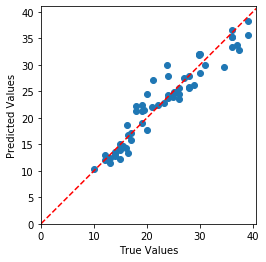

In [137]:
predictions = model.predict(X_test).flatten()

plt.figure()
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.axis("equal")
plt.axis("square")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100,100],[-100,100],color="r",linestyle="dashed")

### Predictions are quite close to the baseline considering the small amount of data that we have for our analysis

### Let us now take a look at the errors and plot them to check whether it is normally distributed or not

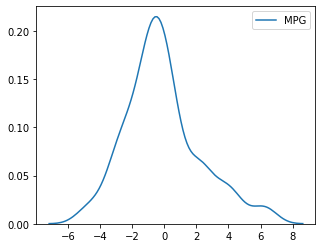

In [143]:
errors = predictions - y_test

plt.figure(figsize=(5,4))
sns.kdeplot(errors)

### The errors are also quite well if not perfectly normally distributed.